<h2 style="color:blue" align="center">Handwritten digits classification using ANN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

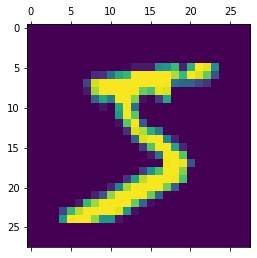

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

# <h3 style='color:purple'>Using ANN for classification</h3>

In [11]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2790 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1227 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0859 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0503 - accuracy: 0.9848


In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9767


[0.07653237134218216, 0.9767000079154968]

# Callbacks

In [17]:
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau,TerminateOnNaN

# ModelCheckpoint

In [18]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
checkpoint = TerminateOnNaN()

In [22]:
model.fit(X_train_flattened, y_train, epochs=50, batch_size=128, validation_data=(X_test_flattened,y_test), callbacks=[checkpoint])

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3654 - accuracy: 0.8996 - val_loss: 0.1993 - val_accuracy: 0.9445
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1698 - accuracy: 0.9518 - val_loss: 0.1456 - val_accuracy: 0.9580
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1245 - accuracy: 0.9640 - val_loss: 0.1213 - val_accuracy: 0.9646
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0990 - accuracy: 0.9718 - val_loss: 0.1015 - val_accuracy: 0.9708
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0807 - accuracy: 0.9771 - val_loss: 0.0909 - val_accuracy: 0.9729
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0679 - accuracy: 0.9808 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0574 - accuracy: 0.9836 - val_loss: 0.0812 - val_accuracy: 0.9764
Epoch 

In [23]:
# accuracy on validation set

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9799


[0.10693635046482086, 0.9799000024795532]

In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9799


[0.10693635046482086, 0.9799000024795532]